<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/plot25dias_linea_apertura_maximini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import yfinance as yf
import pandas as pd
eur=yf.download("EURUSD=X",period="25d",interval="5m").Close
eur.index=pd.DatetimeIndex(eur.index).strftime("%Y-%m-%d")
lista_dias=eur.index.unique()
dia=[]
for x in range(len(lista_dias)):
    dia.append(eur.loc[lista_dias[x]])

[*********************100%***********************]  1 of 1 completed


In [ ]:
nuevo_dia=[] #contiene los dataframes con indices en cada dataframe de la lista dia
for y in dia:
  nuevo_dia.append(y.reset_index())

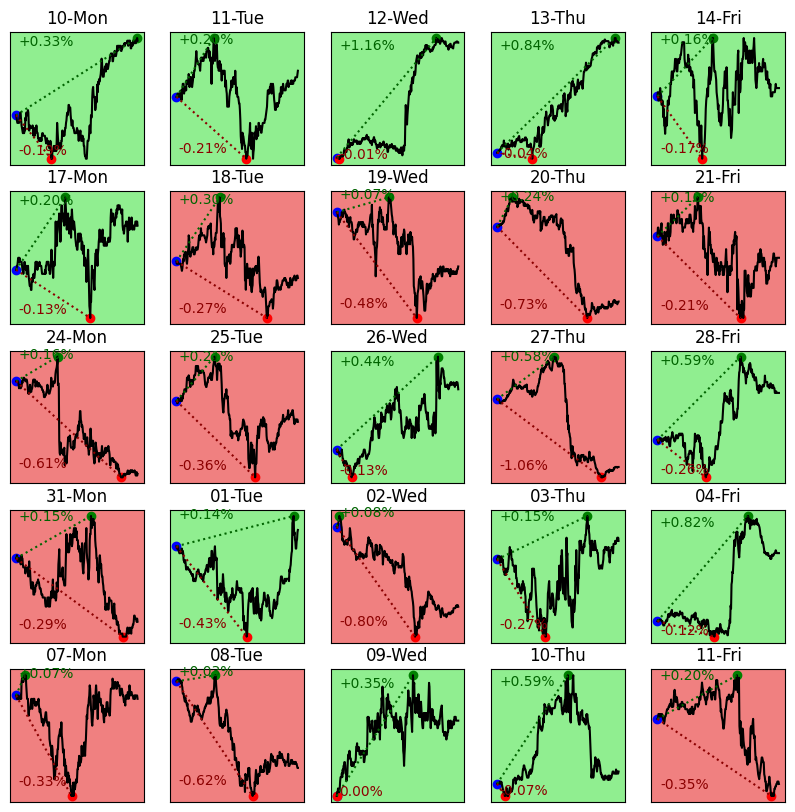

In [ ]:
mensual = figure(figsize=(10, 10))
lista_maximos, lista_minimos, lista_promedios, lista_aperturas = [], [], [], []

for i in range(0, 25):
    aperturas = nuevo_dia[i].Close[0]
    min_indices = nuevo_dia[i].Close.idxmin()
    max_indices = nuevo_dia[i].Close.idxmax()

    min_values = nuevo_dia[i].Close.min()
    max_values = nuevo_dia[i].Close.max()

    if nuevo_dia[i].Close[0] < nuevo_dia[i].Close[len(nuevo_dia[i]) - 1]:
        color_fondo = "lightgreen"
    else:
        color_fondo = "lightcoral"

    subplot(5, 5, i + 1, frameon=True, xticks=[], yticks=[], facecolor=color_fondo)
    plot(nuevo_dia[i].Close.values, color="k")
    title(pd.to_datetime(lista_dias[i]).strftime("%d-%a"))

    # Calcula el cambio porcentual entre aperturas y máximos
    cambio_porcentual_max = ((max_values - aperturas) / aperturas) * 100

    # Calcula el cambio porcentual entre aperturas y mínimos
    cambio_porcentual_min = ((min_values - aperturas) / aperturas) * 100

    # Ajusta la posición del texto para el cambio entre apertura y máximo
    x_pos_max = 0.02 * len(nuevo_dia[i])
    y_pos_max = max_values - (0.1 * (max_values - aperturas))
    text(x_pos_max, y_pos_max, f"+{cambio_porcentual_max:.2f}%", fontsize=10, color='darkgreen')

    # Ajusta la posición del texto para el cambio entre apertura y mínimo
    x_pos_min = 0.02 * len(nuevo_dia[i])
    y_pos_min = min_values + (0.1 * (aperturas - min_values))
    text(x_pos_min, y_pos_min, f"{cambio_porcentual_min:.2f}%", fontsize=10, color='darkred')

    scatter(0, aperturas, color='b', label='Aperturas')
    scatter(max_indices, max_values, color='green', label='Máximos')
    scatter(min_indices, min_values, color='red', label='Mínimos')
    plot([0, max_indices], [aperturas, max_values], color='darkgreen', linestyle=':', label='Línea de aperturas y máximos')
    plot([0, min_indices], [aperturas, min_values], color='darkred', linestyle=':', label='Línea de aperturas y mínimos')
show()
